# CQuest Challenge

In [2]:
# Importing the Packages

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from keplergl import KeplerGl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Importing and reading the files from the data folder 

samples_df = pd.read_csv('data\RaCA_samples.csv')
pedons_df = pd.read_csv('data\RaCA_SOC_pedons.csv')
general_location_df = pd.read_csv('data\RaCa_general_location.csv')

### The best way to start is to know which Location is the data set about 

In [4]:
# Creating a GeoDataFrame from a DataFrame by creating a new column geomtry and setting a CRS value to it. 

general_location_df['geometry'] = [Point(x,y) for x,y in zip(general_location_df['Gen_long'], general_location_df['Gen_lat'])]
general_location_gdf = gpd.GeoDataFrame(data=general_location_df, geometry=general_location_df['geometry'])
general_location_gdf.drop(columns=['Gen_lat', 'Gen_long'], inplace=True)
general_location_gdf.set_crs(epsg=4326)

,RaCA_Id,geometry
0,C0107F02,POINT (-124.65000 48.27000)
1,C0104F05,POINT (-124.52000 47.92000)
2,C0104F09,POINT (-124.50000 47.90000)
3,C0120P02,POINT (-124.49000 42.80000)
4,C0104F03,POINT (-124.48000 46.80000)
...,...,...
6400,C0606W02,POINT (-110.77000 39.46000)
6401,C0604W05,POINT (-110.99000 39.21000)
6402,C0118F04,POINT (-122.55000 44.75000)
6403,C0114F06,POINT (-122.88000 44.46000)


In [5]:
base_map_1 = KeplerGl(height=600, width=800)
base_map_1.add_data(data=general_location_gdf.copy(), name = 'area_of_interest')
base_map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'area_of_interest': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18…

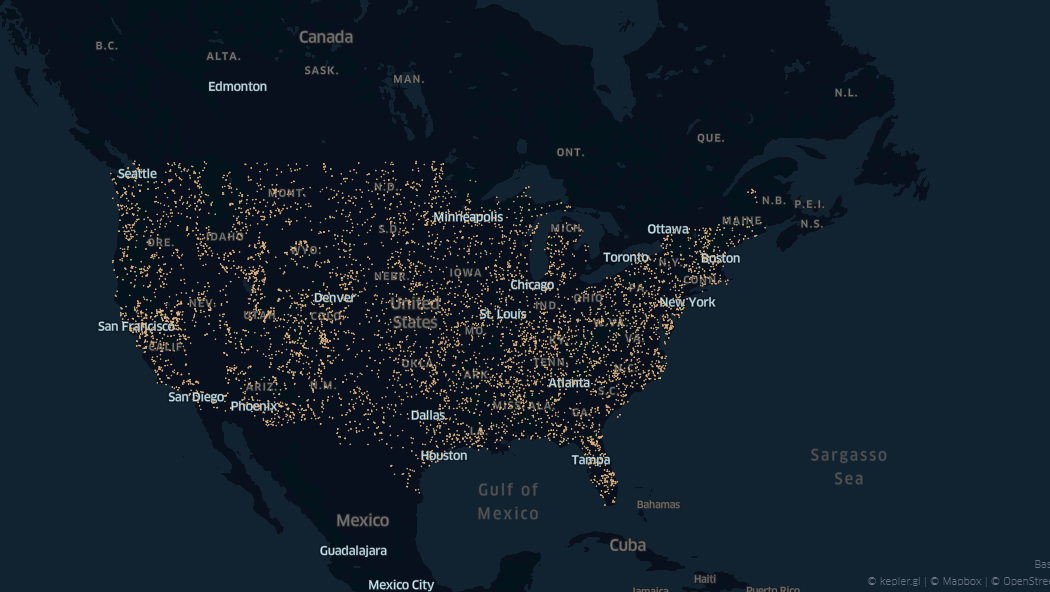

#### **`Conclusion:`** - As we can see in the KeplerGL the points and the dataset is for the United States of America

### Working on Pedons and Samples Data set to find the Common Keys to Merge the Datasets  

In [6]:
# Making the List of Columns to Understand the Unique Identifier for both the datasets (Will be helpful for merging as well)
# Notes has been made

identifiers_samples = ['samp', 'sample.id', 'rcasiteid', 'pedon_no', 'upedonid', 'upedon']
identifiers_pedons = ['upedonid', 'rcasiteid', 'upedon']

In [7]:
samples_df[identifiers_samples].head(3)

,samp,sample.id,rcasiteid,pedon_no,upedonid,upedon
0,C0101F011-1,1.0,C0101F01,1,C0101F01-1,C0101F011
1,C0101F011-2,1.0,C0101F01,1,C0101F01-1,C0101F011
2,C0101F011-3,2.0,C0101F01,1,C0101F01-1,C0101F011


* `samp` - Looks the most informative, with having the rca site id (C0101F01), along with the pedon number (01) and the sample number (-1)*
* `samp` - XXXXXXXXY-Z (Where X is the rca site ID, y is the pedon number of the site, and Z is the sample number)
* We can use `upedon` and `samp` and `rcasiteid` columns and remove the others
* `samp` - To get the sample IDs
* `rcasiteid` - To Merge with General location data
* `upedon` - Has the pedon number with the rcasiteid

In [8]:
samples_df.drop(columns=['sample.id', 'pedon_no', 'upedonid'], inplace=True)

In [9]:
pedons_df.loc[pedons_df['upedon'] == 'C0101F011'][identifiers_pedons]

,upedonid,rcasiteid,upedon
43,C0101F01-1,C0101F01,C0101F011


* `upedon` - Unique RaCA pedon ID contains the site and pedon within the site
* `upedonid` - This column has lots of typos, sometimes a hyphen '-' is used sometimes an underscore '_' 
* `rcasiteid` - This column is needed for the Mapping with the General Location Data

In [10]:
pedons_df.drop(columns = ['upedonid'], inplace=True)

upedonid	link to User Pedon ID\
MO	Region\
MOGr	Soil Group\
LU	LU/LC class\
MOGrLU	Group and LULC class\
rcasiteid	individual RaCA site\
upedon	unique RaCA pedon ID - contains site and pedon within site\
SOCstock5	stock summed to 5 cm by fixed depth\
SOCstock30	stock summed to 30 cm by fixed depth\
SOCstock100	stock summed to 100 cm by fixed depth\
Sample_count	total no of samples\
total_thickness	max bottom depth of pedon\
SOC_count	no of samples (for this pedon) with SOC\
Lab_count	no of samples (for this pedon) with a KSSL ID\
Depth_to_R	depth to R or Cr horizon\
Non-R_SampleCount	Number of samples not including R or Cr's\
SOC_thickness	Max bottom depth with SOC measured\
USE	assigns the max depth this pedon should be used for\


## Studying Pedons Dataset (Taking only the Columns to be focused on)

In [11]:
pedons_columns_needed = ['upedon', 'rcasiteid','SOCstock5','SOCstock30', 'SOCstock100']
pedons_df = pedons_df[pedons_columns_needed]

In [12]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100
0,A0108P921,A0108P92,15.126360,76.022073,100.113941
1,A0116P901,A0116P90,35.481720,95.965557,242.002573
2,A0116P941,A0116P94,36.827055,104.147733,293.079581
3,A0116X971,A0116X97,6.950620,29.854781,69.735244
4,A0120R931,A0120R93,13.072982,53.249971,116.996856


In [13]:
print(pedons_df['upedon'].nunique() == len(pedons_df))
print(pedons_df['rcasiteid'].nunique() == len(pedons_df))

True
True


**`Conclusion:`** - There are no duplicate records

<AxesSubplot:>

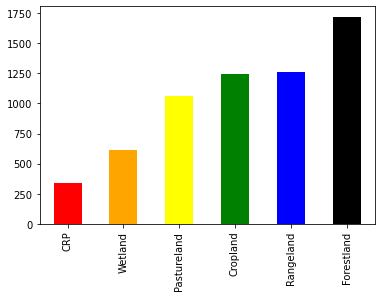

In [14]:
# Fetching the Land Use from the RaCA Side Id from upedon column and storing in a new column
pedons_df.loc[:,'Land_Use'] = pedons_df['upedon'].apply(lambda x : x[5])

# Creating a dictionary to decode the Letter for the Land Use
land_use_dict = dict(C='Cropland', F='Forestland', P='Pastureland', R='Rangeland', W='Wetland', X='CRP')

# Replacing the LandUse with the Letters. 
pedons_df.replace({'Land_Use' : land_use_dict}, inplace=True)

#Plotting the Land Use
pedons_df.loc[:,'Land_Use'].value_counts().sort_values().plot(kind = 'bar', color=['red','orange','yellow','green','blue','black'])

#### **`Conclusion:`** Based on the plot, we can say Forestlands had the most data

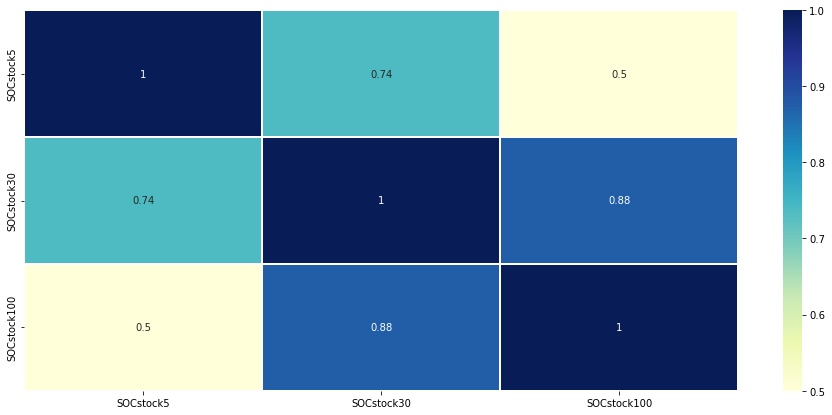

In [15]:
plt.figure(figsize=(16,7))
sns.heatmap(pedons_df.corr(), annot=True, linewidths = 0.1, cmap="YlGnBu")
plt.show()

#### **`Conclusion:`** SOCstock100 and SOCstock30 are highly co-related to each other

In [16]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,A0108P921,A0108P92,15.126360,76.022073,100.113941,Pastureland
1,A0116P901,A0116P90,35.481720,95.965557,242.002573,Pastureland
2,A0116P941,A0116P94,36.827055,104.147733,293.079581,Pastureland
3,A0116X971,A0116X97,6.950620,29.854781,69.735244,CRP
4,A0120R931,A0120R93,13.072982,53.249971,116.996856,Rangeland


In [17]:
grouped = pedons_df.groupby(by='Land_Use')

In [18]:
def mean_print(key, groups):
    print('For Land which is used for - {}'.format(key))
    print('\t The SOCstock5 mean is : {}'.format(groups['SOCstock5'].mean()))
    print('\t The SOCstock30 mean is : {}'.format(groups['SOCstock30'].mean()))
    print('\t The SOCstock100 mean is : {}'.format(groups['SOCstock100'].mean()))

In [21]:
type_land = []
SOC5 = []
SOC30 = []
SOC100 = []

In [22]:
def append_list(key,groups):
    type_land.append(key)
    SOC5.append(groups['SOCstock5'].mean())
    SOC30.append(groups['SOCstock30'].mean())
    SOC100.append(groups['SOCstock100'].mean())

In [23]:
for key, groups in grouped:
    mean_print(key,groups)
    append_list(key,groups)

For Land which is used for - CRP
	 The SOCstock5 mean is : 17.94755321132738
	 The SOCstock30 mean is : 54.70398204558004
	 The SOCstock100 mean is : 91.50707602729554
For Land which is used for - Cropland
	 The SOCstock5 mean is : 14.199687191123312
	 The SOCstock30 mean is : 70.41648119942978
	 The SOCstock100 mean is : 146.5111648078408
For Land which is used for - Forestland
	 The SOCstock5 mean is : 53.15433028072902
	 The SOCstock30 mean is : 128.6456394784585
	 The SOCstock100 mean is : 207.9934057952518
For Land which is used for - Pastureland
	 The SOCstock5 mean is : 21.42079596578424
	 The SOCstock30 mean is : 73.62087646883595
	 The SOCstock100 mean is : 147.79318357660844
For Land which is used for - Rangeland
	 The SOCstock5 mean is : 12.570540478231836
	 The SOCstock30 mean is : 42.790839063136815
	 The SOCstock100 mean is : 78.07248038288012
For Land which is used for - Wetland
	 The SOCstock5 mean is : 52.3758312897122
	 The SOCstock30 mean is : 222.9716938365186
	 The

In [24]:
df_temp = pd.DataFrame({'SOC5': SOC5,
                   'SOC30': SOC30,
                   'SOC100': SOC100}, index=type_land)

<AxesSubplot:>

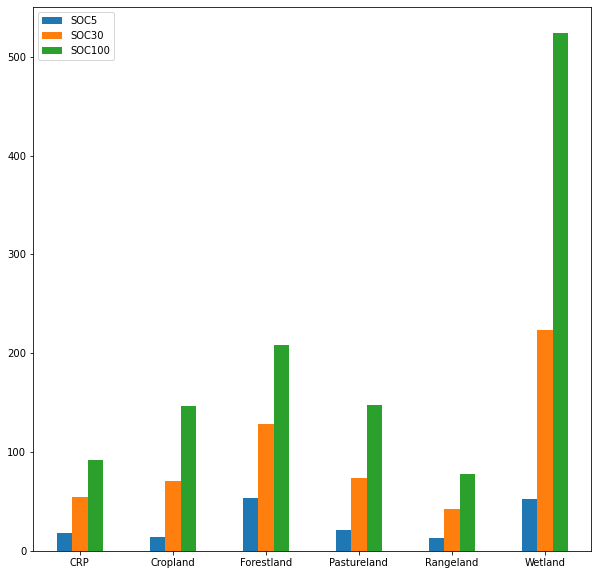

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
df_temp.plot(ax=ax, kind='bar', rot=0)

### Samples Data Set

In [29]:
samples_columns_needed = ['samp','rcasiteid','upedon','Bulkdensity','SOC_pred1','Texture','fragvolc','c_tot_ncs','n_tot_ncs','s_tot_ncs','caco3']
samples_df = samples_df[samples_columns_needed]

In [30]:
samples_df.head()

,samp,rcasiteid,upedon,Bulkdensity,SOC_pred1,Texture,fragvolc,c_tot_ncs,n_tot_ncs,s_tot_ncs,caco3
0,C0101F011-1,C0101F01,C0101F011,0.881002,49.674091,PM,0.0,48.094150,2.401340,0.187482,NaN
1,C0101F011-2,C0101F01,C0101F011,0.881002,49.674091,PM,0.0,50.142574,1.621640,0.095915,NaN
2,C0101F011-3,C0101F01,C0101F011,0.967665,55.530000,PM,0.0,55.529768,1.177027,0.031538,NaN
3,C0101F012-1,C0101F01,C0101F012,0.884497,43.370000,PM,0.0,43.365442,2.165691,0.078548,NaN
4,C0101F012-2,C0101F01,C0101F012,0.910510,44.860000,PM,0.0,44.857623,2.438623,0.082074,NaN


In [31]:
pedons_df.head()

,upedon,rcasiteid,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,A0108P921,A0108P92,15.126360,76.022073,100.113941,Pastureland
1,A0116P901,A0116P90,35.481720,95.965557,242.002573,Pastureland
2,A0116P941,A0116P94,36.827055,104.147733,293.079581,Pastureland
3,A0116X971,A0116X97,6.950620,29.854781,69.735244,CRP
4,A0120R931,A0120R93,13.072982,53.249971,116.996856,Rangeland


In [32]:
samples_pedons_df = samples_df.merge(pedons_df, on=['upedon', 'rcasiteid'], how='inner')

In [33]:
samples_pedons_df.head()

,samp,rcasiteid,upedon,Bulkdensity,SOC_pred1,Texture,fragvolc,c_tot_ncs,n_tot_ncs,s_tot_ncs,caco3,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,C0101F011-1,C0101F01,C0101F011,0.881002,49.674091,PM,0.0,48.094150,2.401340,0.187482,NaN,169.511025,1076.864591,3805.801642,Forestland
1,C0101F011-2,C0101F01,C0101F011,0.881002,49.674091,PM,0.0,50.142574,1.621640,0.095915,NaN,169.511025,1076.864591,3805.801642,Forestland
2,C0101F011-3,C0101F01,C0101F011,0.967665,55.530000,PM,0.0,55.529768,1.177027,0.031538,NaN,169.511025,1076.864591,3805.801642,Forestland
3,C0101W011-1,C0101W01,C0101W011,0.918831,29.594032,None,0.0,50.992633,3.230560,0.320330,NaN,338.654705,1205.698308,3853.560256,Wetland
4,C0101W011-2,C0101W01,C0101W011,0.904953,48.090000,PM,0.0,48.089204,2.929916,0.106421,NaN,338.654705,1205.698308,3853.560256,Wetland


Column Meanings : 
* `samp` - Unique sample number
* `rcasiteid` - RCA Site ID
* `upedon` - Pedon ID
* `Bulkdensity` - bulk density (g/cm3) used in SOC stock calculations 
* `SOC_pred1` - first SOC predicttion used in stock estimates - % soil organic carbon predicted from VNIR scan - using Sequeira et al., 2013
* `Texture` - USDA soil texture class as determined during sampling
* `fragvolc` - visual estimate of fragments >2mm - fragvolc in NASIS
* `c_tot_ncs` - total combustion carbon; SSIR No. 42, version 4, page 473
* `n_tot_nsc` - total combustion nitrogen; SSIR No. 42, version 4, page 473
* `s_tot_ncs` - total combustion sulfur; SSIR No. 42, version 4, page 473
* `caco3` - Calcium Carbonate Equivalent, <2mm,SSIR No. 42, version 3, page 271
* `SOCstock5` - stock summed to 5 cm by fixed depth
* `SOCstock30` - stock summed to 30 cm by fixed depth
* `SOCstock100` - stock summed to 5 cm by fixed depth
* `Land_Use` - Use of Land

In [38]:
print('Total Number of Sample we have in the joined dataset is {}'.format(samples_pedons_df['samp'].nunique()))
print('Total Number of Pedons we have in the joined dataset is {}'.format(samples_pedons_df['upedon'].nunique()))
print('Average Samples per Pedon is {}'.format(samples_pedons_df['samp'].nunique()/samples_pedons_df['upedon'].nunique()))

Total Number of Sample we have in the joined dataset is 7679
Total Number of Pedons we have in the joined dataset is 1565
Average Samples per Pedon is 4.906709265175719


In [52]:
general_location_gdf.rename(columns={'RaCA_Id' : 'rcasiteid'}, inplace=True)

In [53]:
type(general_location_gdf)

geopandas.geodataframe.GeoDataFrame

In [54]:
general_location_gdf.columns

Index(['rcasiteid', 'geometry'], dtype='object')

In [57]:
joined = general_location_gdf.merge(samples_pedons_df, on='rcasiteid')

In [58]:
joined.head()

,rcasiteid,geometry,samp,upedon,Bulkdensity,SOC_pred1,Texture,fragvolc,c_tot_ncs,n_tot_ncs,s_tot_ncs,caco3,SOCstock5,SOCstock30,SOCstock100,Land_Use
0,C0107F02,POINT (-124.65000 48.27000),C0107F021-1,C0107F021,0.953805,55.580000,PM,0.0,53.527267,2.242210,0.185752,NaN,184.885955,627.905363,NaN,Forestland
1,C0107F02,POINT (-124.65000 48.27000),C0107F021-2,C0107F021,1.200590,37.946338,sil,0.0,51.575090,1.729820,0.211545,NaN,184.885955,627.905363,NaN,Forestland
2,C0107F02,POINT (-124.65000 48.27000),C0107F021-3,C0107F021,1.111808,6.512871,sicl,5.0,3.445784,0.305839,0.021409,NaN,184.885955,627.905363,NaN,Forestland
3,C0107F02,POINT (-124.65000 48.27000),C0107F021-4,C0107F021,1.178822,5.701971,l,10.0,3.332542,0.205712,0.024685,0.051788,184.885955,627.905363,NaN,Forestland
4,C0107F02,POINT (-124.65000 48.27000),C0107F021-5,C0107F021,1.236786,1.482753,l,5.0,1.079146,0.142529,0.010181,NaN,184.885955,627.905363,NaN,Forestland


In [70]:
base_map_2 = KeplerGl(height=600, width=800)
base_map_2.add_data(data=joined.copy(), name = 'area_of_interest')
base_map_2.save_to_html()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to keplergl_map.html!


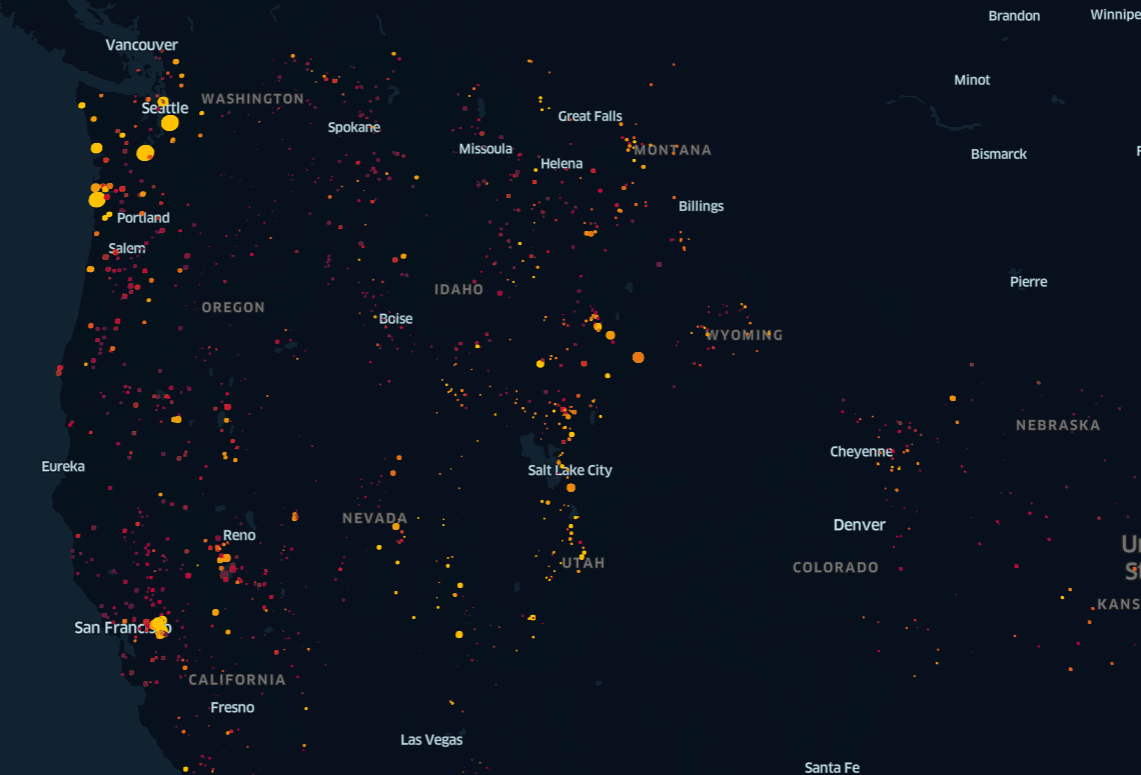